# ANOVA Test: Analysis of Variance

## 1. Introduction to ANOVA

**Objective:** Understand when and why to use ANOVA.

**Definition:** ANOVA (Analysis of Variance) helps determine if there are statistically significant differences between the means of three or more independent groups.

**Use Case Examples:** 
- Testing different teaching methods' effectiveness.
- Comparing means of sales across regions.
- Medical studies comparing drug effects across multiple groups.


## 2. Key Concepts in ANOVA

- **Hypotheses:**
  - **Null Hypothesis (H₀):** All group means are equal.
  - **Alternative Hypothesis (H₁):** At least one group mean is different.
- **Assumptions of ANOVA:**
  - Independence of observations.
  - Normally distributed groups.-shapiro
  - Homogeneity of variances across groups.--same var-levene


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, levene, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Generate example data
np.random.seed(42)
group_A = np.random.normal(50, 10, 30)
group_B = np.random.normal(55, 10, 30)
group_C = np.random.normal(60, 10, 30)

# Combine into DataFrame
data = pd.DataFrame({
    'Score': np.concatenate([group_A, group_B, group_C]),
    'Group': ['A']*30 + ['B']*30 + ['C']*30
})
data.head(20)


,Score,Group
0,54.967142,A
1,48.617357,A
2,56.476885,A
3,65.230299,A
4,47.658466,A
5,47.658630,A
6,65.792128,A
7,57.674347,A
8,45.305256,A
9,55.425600,A


In [11]:
# Descriptive Statistics
data.groupby('Group').describe()

Score                                                                   \
      count       mean       std        min        25%        50%        75%   
Group                                                                          
A      30.0  48.118531  9.000064  30.867198  44.089491  47.658548  53.603353   
B      30.0  53.788375  9.311022  35.403299  47.908863  54.354272  60.446618   
C      30.0  60.128848  9.919830  33.802549  54.858581  60.256105  67.377112   

                  
             max  
Group             
A      65.792128  
B      73.522782  
C      75.646437

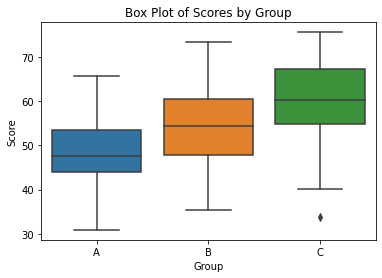

In [3]:
# Visualization
sns.boxplot(x='Group', y='Score', data=data)
plt.title("Box Plot of Scores by Group")
plt.show()


**Interpretation:** The box plot allows us to visually inspect the distribution of scores across each group. If the medians and spreads vary significantly, it may indicate a difference in group means, which we can test with ANOVA.


In [4]:
Results= f_oneway(data[data['Group'] == 'A']['Score'],
                           data[data['Group'] == 'B']['Score'],
                           data[data['Group'] == 'C']['Score'])

Results


F_onewayResult(statistic=12.20952551797281, pvalue=2.1200748140507065e-05)

In [5]:
F_stat, p_value = Results[0], Results[1]
print("F-statistic:", F_stat)
print("p-value:", p_value)


F-statistic: 12.20952551797281
p-value: 2.1200748140507065e-05


# Performing ANOVA using OLS (Ordinary Least Squares) method

In [12]:
# Performing ANOVA using OLS (Ordinary Least Squares) method
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example OLS model for One-Way ANOVA
formula = 'Score ~ C(Group)'
lm = ols(formula, data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)


               sum_sq    df          F    PR(>F)
C(Group)  2165.964313   2.0  12.209526  0.000021
Residual  7716.880356  87.0        NaN       NaN


**Interpretation:**

- The **F-statistic** represents the ratio of variance between the groups to the variance within the groups. A higher F-statistic suggests greater disparity between group means.
- The **p-value** indicates the likelihood that the observed differences are due to random chance. A p-value below our significance threshold (e.g., 0.05) leads us to reject the null hypothesis, concluding that at least one group mean differs significantly.


#two way anova
#manova
#ancova
#one way anova